# **Análise de Dados de E-Commerces**

Neste notebook estarei utilizando o dataset **Brazilian E-Commerce Public Dataset by Olist**, disponível no link: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

O objetivo desta análise é responder as seguintes perguntas:
1. Qual a média, mediana e desvio padrão do tempo de entrega dos produtos?
2. Qual o valor da receita total por categoria de produto?
3. Qual a quantidade de pedidos por estado?
4. Dado um estado, qual a quantidade de pedidos por cidade?
5. Qual o valor da receita total por estado?
6. Dado um estado, qual o valor da receita total por cidade?
7. Como estão distribuidas as avaliações?
8. Qual é o ticket médio por pedido?
8. Qual é o ticket médio por cliente?

### **Importando as Bibiliotecas**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

### **Carregando e Visualizando os Dados**

Obtendo os caminhos utilizando o `Path` da biblioteca `pathlib`.

In [2]:
BASE_PATH = Path.cwd().parent

ORDERS_PATH = BASE_PATH / 'dados_analise' / 'olist_orders_dataset.csv'
CUSTOMERS_PATH = BASE_PATH / 'dados_analise' / 'olist_customers_dataset.csv'
PRODUCTS_PATH = BASE_PATH / 'dados_analise' / 'olist_products_dataset.csv'
ORDER_ITEMS_PATH = BASE_PATH / 'dados_analise' / 'olist_order_items_dataset.csv'
REVIEWS_PATH = BASE_PATH / 'dados_analise' / 'olist_order_reviews_dataset.csv'

Carregando os dados dos pedidos.

In [3]:
df_orders = pd.read_csv(ORDERS_PATH)
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Carregando os dados dos clientes.

In [4]:
df_customers = pd.read_csv(CUSTOMERS_PATH)
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Carregando os dados dos produtos.

In [5]:
df_products = pd.read_csv(PRODUCTS_PATH)
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Carregando os dados dos produtos de cada pedido.

In [6]:
df_order_items = pd.read_csv(ORDER_ITEMS_PATH)
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Carregando os dados das avaliações.

In [7]:
df_reviews = pd.read_csv(REVIEWS_PATH)
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### **Transformando os Dados**

Primeiramente, iremos descobrir de qual cidade e estado cada pedido foi feito. Para isso, iremos mesclar `df_orders` e `df_customers`, utilizando a coluna `customer_id` como base pois ela está presente em ambas as tabelas, para obter as colunas `customer_city` e `customer_state`.

In [8]:
df_orders = df_orders.merge(df_customers[['customer_id', 'customer_city', 'customer_state']], how='left', on='customer_id')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,santo andre,SP


A seguir iremos transformar o tipo dos dados das colunas `order_approved_at` e `order_delivered_customer_date` em `datetime`. Fazemos isso para que seja possível realizar operações aritméticas entre as datas para obter a quantidade de dias entre a data em que o pedido foi aprovado e a data de entrega.

In [9]:
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['total_time'] = (df_orders['order_delivered_customer_date'] - df_orders['order_approved_at']).dt.days
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,total_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,sao paulo,SP,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,barreiras,BA,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,vianopolis,GO,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,sao goncalo do amarante,RN,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,santo andre,SP,2.0


Além disso, iremos realizar uma série de mesclagens em `df_order_items`:
1. A primeira mesclagem será entre `df_order_items` e `df_products`, utilizando a coluna `product_id` como base para obter a coluna `product_category_name`.
2. A segunda mesclagem será entre `df_order_items` e `df_orders`, utilizando a coluna `order_id` como base para obter a coluna `costumer_id`.
3. A terceira mesclagem será entre `df_order_items` e `df_customers`, utilizando a coluna `customer_id` como base para obter as colunas `customer_city` e `customer_state`.

In [10]:
df_order_items = df_order_items.merge(df_products[['product_id', 'product_category_name']], how='left', on='product_id')
df_order_items = df_order_items.merge(df_orders[['order_id', 'customer_id']], how='left', on='order_id')
df_order_items = df_order_items.merge(df_customers[['customer_id', 'customer_city', 'customer_state']], how='left', on='customer_id')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,varzea paulista,SP


Ainda em `df_order_items`, existe a coluna `order_item_id` que armazena de forma **sequencial** a quantidade de produtos incluídos no pedido. Por exemplo, o produto com `order_id` igual a `00143d0f86d6fbd9f9b38ab440ac16f5` tem 3 produtos, sabemos disso pois ele possui 3 registros, o primeiro tem `order_item_id` igual a 1, o segundo tem  `order_item_id` igual a 2 e o terceiro tem `order_item_id` igual a 3. Isso significa que será preciso deixar apenas o registro de cada `order_id` que tenha o maior `order_item_id`.

Para fazer isso iremos agrupar `df_order_items` por `order_id` e obter o índice do registro que tem o maior `order_item_id`. Então, iremos filtrar os registros utilizando esses índices.

In [11]:
indices = df_order_items.groupby('order_id')['order_item_id'].idxmax()
df_order_items = df_order_items.loc[indices].reset_index(drop=True)
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,varzea paulista,SP


Por fim, iremos criar a coluna com o valor total do pedido (`total_price`) que é a quantidade de itens (coluna `order_item_id`) multiplicado pelo preço (coluna `price`).

In [12]:
df_order_items['total_price'] = df_order_items['order_item_id'] * df_order_items['price']
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_id,customer_city,customer_state,total_price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,RJ,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,santa fe do sul,SP,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,6489ae5e4333f3693df5ad4372dab6d3,para de minas,MG,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,d4eb9395c8c0431ee92fce09860c5a06,atibaia,SP,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,58dbd0b2d70206bf40e62cd34e84d795,varzea paulista,SP,199.90


### **Analisando os Dados**

Para obter a quantidade de pedidos por estado iremos agrupar `df_orders` por `customer_state`, contar a quantidade de `order_id` e depois ordenar os valores.

In [13]:
df_order_state_count = df_orders['customer_state'].value_counts().reset_index()
df_order_state_count

,customer_state,count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


Para obter as cidades por estado com a maior quantidade de pedidos iremos filtrar os registros de `df_orders` em que os registros da coluna `customer_state` sejam iguais ao estado desejado. Após isso, iremos agrupar `df_order_city` por `customer_city`, depois contaremos a quantidade de `order_id` e por fim ordenaremos os valores. 

In [14]:
def get_order_count_by_city(df_orders: pd.DataFrame, state: str) -> pd.DataFrame:
    df_order_city = df_orders[df_orders['customer_state'] == state]
    df_order_city_count = df_order_city['customer_city'].value_counts().reset_index()
    return df_order_city_count

df_order_city_count = get_order_count_by_city(df_orders, 'PA')
df_order_city_count

,customer_city,count
0,belem,443
1,ananindeua,88
2,santarem,44
3,parauapebas,27
4,altamira,25
...,...,...
84,murucupi,1
85,senador jose porfirio,1
86,aurora do para,1
87,itupiranga,1


Para obter as categorias de produtos que geram a maior receita iremos agrupar `df_order_items` por `product_category_name`, somar os valores de `total_price` e depois ordernar os valores.

In [15]:
df_product_income = df_order_items.groupby('product_category_name')['total_price'].sum().reset_index()
df_product_income = df_product_income.sort_values(by='total_price', ascending=False).reset_index(drop=True)
df_product_income

,product_category_name,total_price
0,beleza_saude,1257970.83
1,relogios_presentes,1206520.90
2,cama_mesa_banho,1038954.92
3,esporte_lazer,986570.82
4,informatica_acessorios,911022.62
...,...,...
68,flores,1023.34
69,casa_conforto_2,786.07
70,cds_dvds_musicais,730.00
71,fashion_roupa_infanto_juvenil,489.87


Para obter os estados que geram a maior receita iremos agrupar `df_order_items` por `customer_state`, somar os valores de `total_price` e depois ordenar os valores.

In [16]:
df_state_income = df_order_items.groupby('customer_state')['total_price'].sum().reset_index()
df_state_income = df_state_income.sort_values(by='total_price', ascending=False).reset_index(drop=True)
df_state_income

,customer_state,total_price
0,SP,5202333.69
1,RJ,1824590.61
2,MG,1584805.34
3,RS,749953.54
4,PR,682774.43
5,SC,515800.57
6,BA,511490.94
7,DF,302895.51
8,GO,295117.72
9,ES,274645.92


Para obter as cidades por estado que geram a maior receita iremos filtrar os registros de `df_order_items` em que os registros da coluna `customer_state` sejam iguais ao estado desejado. Após isso, iremos agrupar `df_income_city` por `customer_city`, depois somaremos os valores de `total_price` e por fim ordenaremos os valores.

In [17]:
def get_total_income_by_city(df_order_items: pd.DataFrame, state: str) -> pd.DataFrame:
    df_city_income = df_order_items[df_order_items['customer_state'] == state]
    df_total_city_income = df_city_income.groupby('customer_city')['total_price'].sum().reset_index()
    df_total_city_income = df_total_city_income.sort_values(by='total_price', ascending=False).reset_index(drop=True)
    return df_total_city_income

df_city_income = get_total_income_by_city(df_order_items, 'PA')
df_city_income

,customer_city,total_price
0,belem,79018.50
1,ananindeua,18044.39
2,santarem,5387.66
3,altamira,5168.15
4,tucurui,5096.70
...,...,...
84,ulianopolis,27.30
85,tome-acu,24.99
86,tracuateua,13.98
87,medicilandia,8.99


Primeiramente, para calcular o ticket médio por pedido ou cliente precisamos calcular a receita total.

In [18]:
total_income = df_order_items['total_price'].sum()

Agora iremos calcular a quantidade de pedidos únicos para calcular o ticket médio por pedido.

In [19]:
orders_count = df_orders['order_id'].nunique()
order_avg_ticket = total_income/orders_count

Agora iremos calcular a quantidade de clientes únicos para calcular o ticket médio por cliente.

In [20]:
customers_count = df_customers['customer_id'].nunique()
customer_avg_ticket = total_income/customers_count

### **Visualizando os Resultados**

In [21]:
def create_vertical_bar_graph(df, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 5))

    plt.bar(df[x], df[y])

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.tight_layout()
    plt.show()

In [22]:
def create_horizontal_bar_graph(df, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 8))
    ax = plt.gca()

    plt.barh(df[x], df[y])

    plt.title(title, pad=20)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top() 

    plt.tight_layout()
    plt.show()

In [23]:
print(f'Média do Tempo de Entrega: {df_orders['total_time'].mean():.2f} dias')
print(f'Mediana do Tempo de Entrega: {df_orders['total_time'].median():.2f} dias')
print(f'Devio Padrão do Tempo de Entrega: {df_orders['total_time'].std():.2f} dias')

Média do Tempo de Entrega: 11.64 dias
Mediana do Tempo de Entrega: 9.00 dias
Devio Padrão do Tempo de Entrega: 9.52 dias


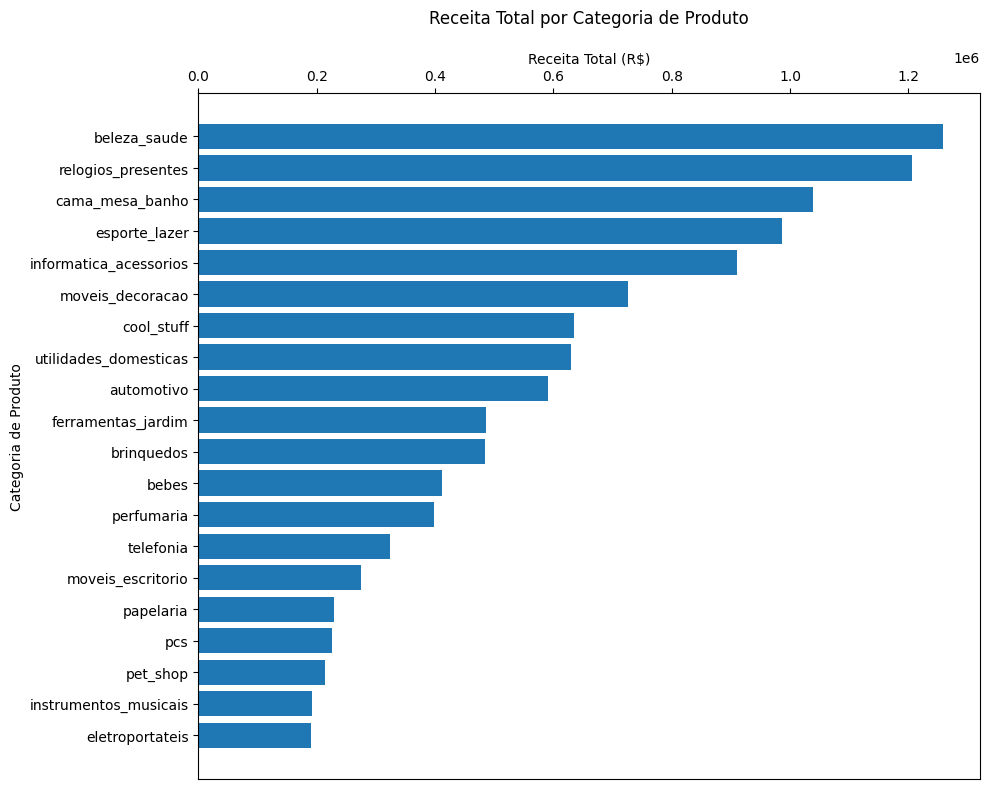

In [24]:
df_product_income = df_product_income.sort_values(by='total_price')
df_product_income = df_product_income.tail(20)

create_horizontal_bar_graph(
    df=df_product_income,
    x='product_category_name',
    y='total_price',
    title='Receita Total por Categoria de Produto',
    xlabel='Receita Total (R$)',
    ylabel='Categoria de Produto'
)

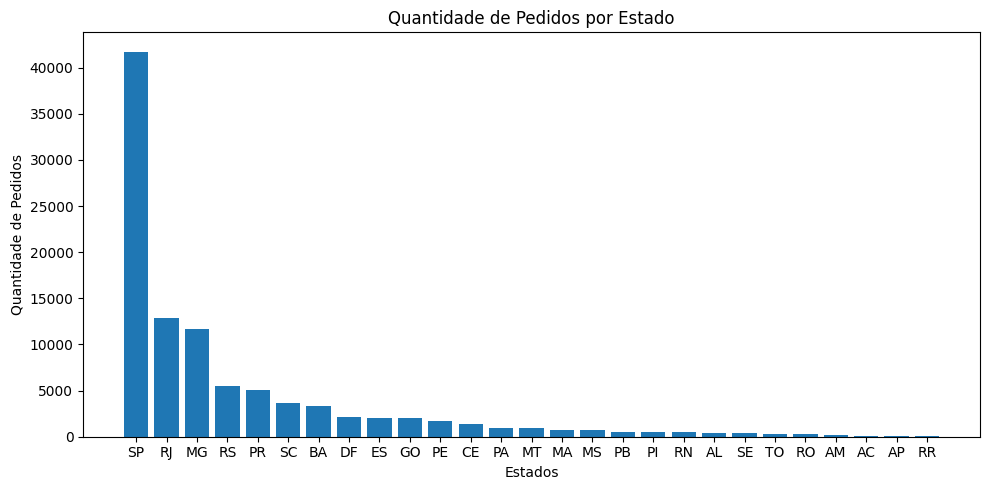

In [25]:
create_vertical_bar_graph(
    df=df_order_state_count, 
    x='customer_state', 
    y='count', 
    title='Quantidade de Pedidos por Estado', 
    xlabel='Estados', 
    ylabel='Quantidade de Pedidos'
)

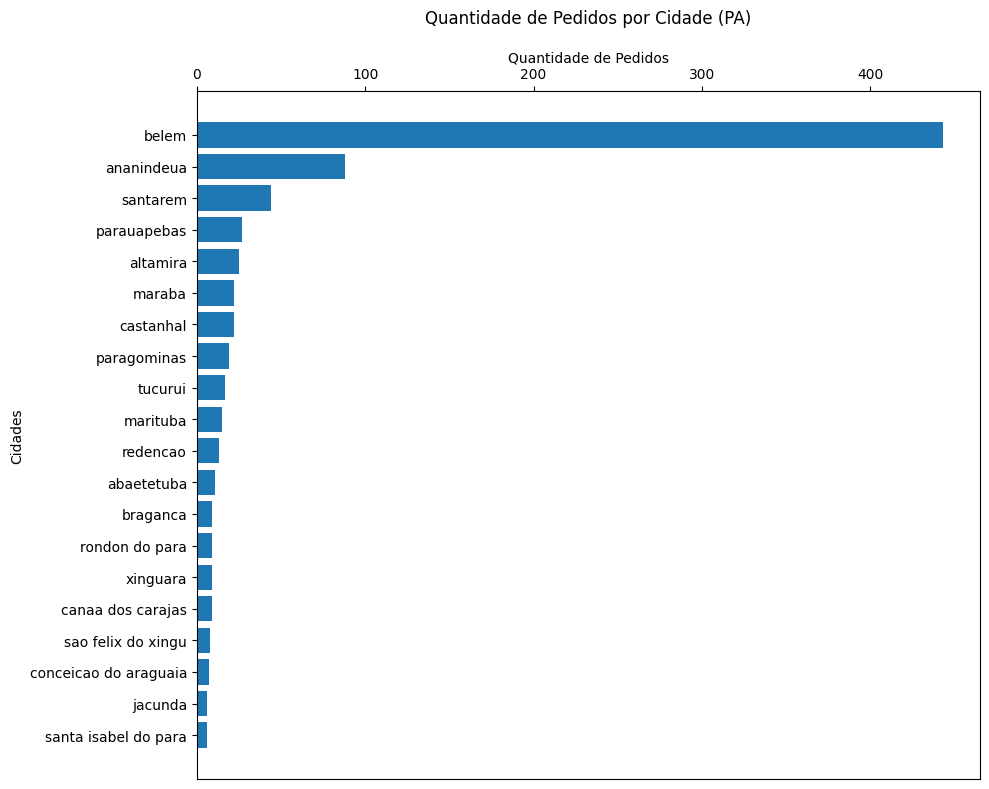

In [26]:
estado = 'PA'

df_order_city_count = get_order_count_by_city(df_orders, estado)
df_order_city_count = df_order_city_count.sort_values(by='count')
df_order_city_count = df_order_city_count.tail(20)

create_horizontal_bar_graph(
    df=df_order_city_count,
    x='customer_city',
    y='count',
    title=f'Quantidade de Pedidos por Cidade ({estado})',
    xlabel='Quantidade de Pedidos',
    ylabel='Cidades'
)

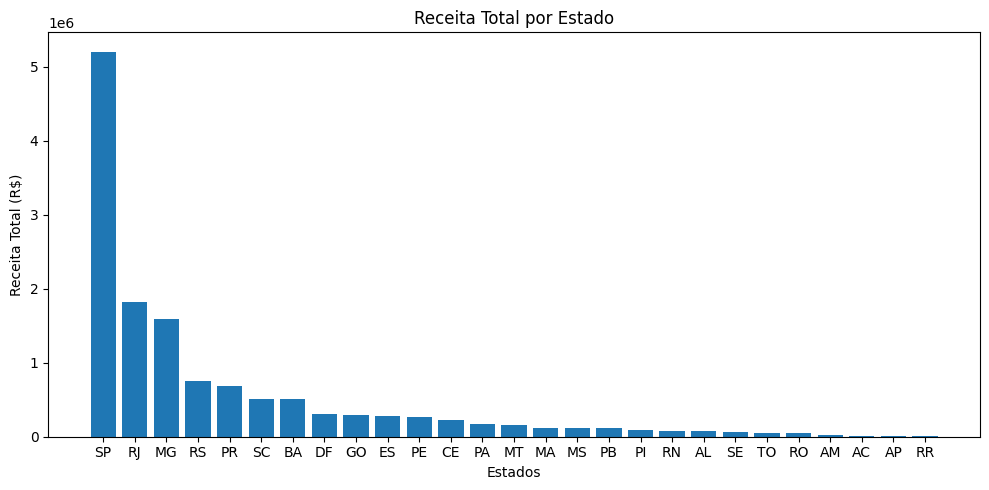

In [27]:
create_vertical_bar_graph(
    df=df_state_income, 
    x='customer_state', 
    y='total_price', 
    title='Receita Total por Estado', 
    xlabel='Estados', 
    ylabel='Receita Total (R$)'
)

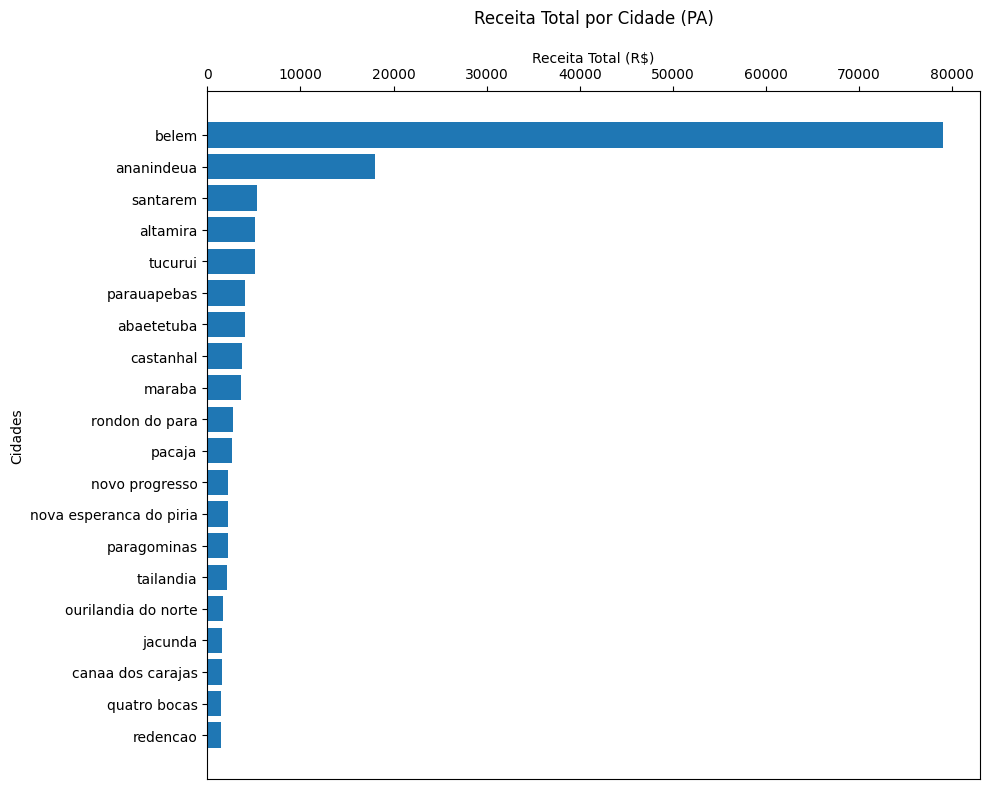

In [28]:
estado = 'PA'

df_city_income = get_total_income_by_city(df_order_items, estado)
df_city_income = df_city_income.sort_values(by='total_price')
df_city_income = df_city_income.tail(20)

create_horizontal_bar_graph(
    df=df_city_income,
    x='customer_city',
    y='total_price',
    title=f'Receita Total por Cidade ({estado})',
    xlabel='Receita Total (R$)',
    ylabel='Cidades'
)

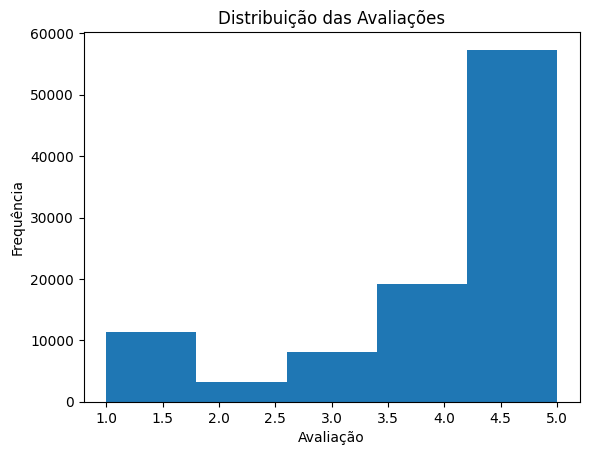

In [29]:
plt.hist(df_reviews['review_score'], bins=5)
plt.title('Distribuição das Avaliações')
plt.xlabel('Avaliação')
plt.ylabel('Frequência')
plt.show()

In [30]:
print(f'Ticket Médio por Pedido: {order_avg_ticket}')
print(f'Ticket Médio por Cliente: {customer_avg_ticket}')

Ticket Médio por Pedido: 136.57206444022088
Ticket Médio por Cliente: 136.57206444022088
